In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

In [5]:
mu_a = 0.06
s = 0.24
mu_b = 0.07
alpha = 0.01
power = 0.95

In [8]:
from math import ceil

def req_sample_size(power, alpha, mu_a, mu_b, s):
    return ceil(((stats.norm.ppf(power) - stats.norm.ppf(alpha)) * (s/(mu_b - mu_a)))**2)

In [6]:
req_sample_size(power, alpha, mu_a, mu_b, s)

9084

In [9]:
mu_a = 0.01
s = 0.099
mu_b = 0.012
alpha = 0.01
power = 0.95
req_sample_size(power, alpha, mu_a, mu_b, s)

38642

## Statistical Power

Consider a previous example 

* $H_0$ : Karen can't correctly guess the weather more than 30% of the time.
* $H_a$ : Karen can correctly guess the weather more than 30% of the time.

What if $H_0$ is true, but we incorrectly reject it?
What if $H_a$ is true, but we incorrectly fail to reject $H_0$?

x| H0 is True            | H0 is False
-------------|----------------------|------------------
**Accept H0**| Correct ($1 - \alpha$)   | Type II error ($\beta$)
**Reject H0** | Type I error ($\alpha$) | Correct ($1 - \beta$)


* alpha is the type I error, also known as false positive rate. It's the probability that we incorrectly reject the null hypothesis.

* beta is the Type II error, also known as false negative rate. It's the probability that we incorrectly fail to reject the null hypothesis.

We *choose* $\alpha$ - this corresponds to our confidence level.

What might affect $\beta$?

<!-- N is the main piece -->

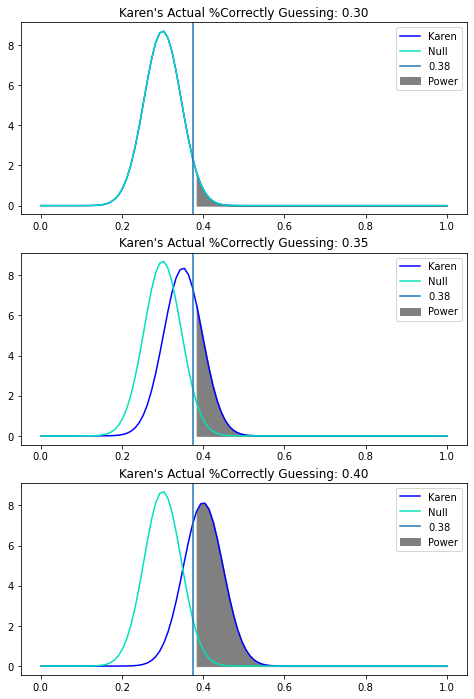

In [18]:
# set up my subplots
fig,axes = plt.subplots(3, figsize = (8, 12))

# for each subplot we're going to iterate through and capture the index and the plot object
for ax_idx, ax in enumerate(axes):

    # Setting up the n and ps for the distributions. 
    # We want to vary the actual value for Karen's correct guessing rate. (not the sampled value)
    n=100
    null_proportion = 0.3
    karen_proportion = 0.3 + 0.05 * ax_idx

    # sampling distribution
    # Stating that karen's true guessing rate should be the sample mean
    karen_sample_mean = karen_proportion
    
    # Establish the standard deviation for Karen's guessing rate
    karen_sd = np.sqrt(karen_proportion * (1-karen_proportion))
    
    # This is the standard error for Karen's sample mean.
    karen_sample_mean_sd = karen_sd / np.sqrt(n)

    # Create a normal distribution for Karen's sample mean. 
    karen = stats.norm(karen_sample_mean, karen_sample_mean_sd)

    # Create sample space of a 100 points between 0.1 and 0.6
    support = np.linspace(0, 1, 100)
    # Finding the pdf at each of these points.
    karen_pdf = karen.pdf(support)

    # Finding the number where we reject the null hypothesis.
    null_mean = 0.3
    null_sd = np.sqrt((null_proportion * (1-null_proportion))/n)
    critical_value_dist = stats.norm(0.3, null_sd)
    critical_value = critical_value_dist.ppf(0.95)
    # find the inddex of the support where it becomes greater than the critical value (threshold)
    critical_value_idx = np.argmax(support>critical_value)
    
    # Plots
    ax.plot(support, karen_pdf, color='blue', label='Karen')
    ax.plot(support, critical_value_dist.pdf(support), color='#00E3B8', label='Null')
    # axvline is for a vertical line
    ax.axvline(critical_value, label = f'{round(critical_value,2)}')

    ax.fill_between(support, karen_pdf, \
                    where = (support >= critical_value), label = 'Power', \
                   color = 'grey')

    # legend and title
    ax.legend()
    ax.set_title("Karen's Actual %Correctly Guessing: {:.2f}".format(karen_proportion))

# Effect Size

The difference between the mean assumed by the null hypothesis and the **true** mean is the effect size. The larger this is, the more likely we are to draw a sample which meets the threshold required by our $\alpha$

#### With a larger effect size, we can get more power with the same alpha.

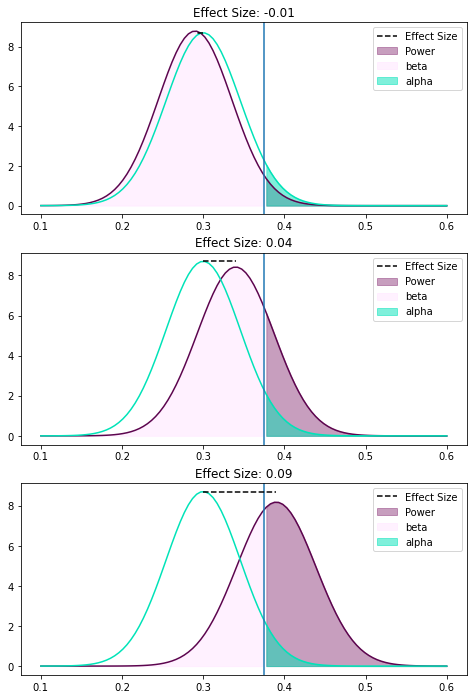

In [26]:

fig,axes = plt.subplots(3, figsize = (8, 12))

for ax_idx, ax in enumerate(axes):
    n=100
    karen_proportion = 0.29 + 0.05 * ax_idx

    # sampling distribution
    karen_sample_mean = karen_proportion
    karen_sd = np.sqrt(karen_proportion * (1-karen_proportion))
    karen_sample_mean_sd = karen_sd / np.sqrt(n)


    karen = stats.norm(karen_sample_mean, karen_sample_mean_sd)
    null = stats.norm(0.3, np.sqrt(0.3 * 0.7 / n))
    
    support = np.linspace(0.1, 0.6, 100)
    karen_pdf = karen.pdf(support)
    null_pdf = null.pdf(support)
    
    
    critical_value = stats.norm(0.3, np.sqrt((null_proportion * (1-null_proportion))/n)).ppf(0.95)
    critical_value_idx = np.argmax(support>critical_value)
    
    ax.plot(support, karen_pdf, color='#5C054E')
    ax.plot(support, null_pdf, color='#00E3B8')

    ax.axvline(critical_value)
    ax.fill_between(support, karen_pdf, where = (support >= critical_value), label = 'Power', color = '#913F7F', alpha = 0.5)
    ax.fill_between(support, karen_pdf, where = (support <= critical_value), alpha = 0.5, label = 'beta', color = '#FFE5FF')
    ax.fill_between(support, null_pdf, where = (support >= critical_value), label = 'alpha', color = '#00E3B8', alpha = 0.5)
    
    point2 = [karen_sample_mean, 8.7]
    point1 = [0.3, 8.7]
    x_vals = [point1[0], point2[0]]
    y_vals = [point1[1], point2[1]]
    
    ax.plot(x_vals, y_vals, c = 'k', label = 'Effect Size', ls = '--')
    ax.legend()
    ax.set_title("Effect Size: {:.2f}".format(karen_proportion - 0.3))


#### With a higher sample size, we get more power.

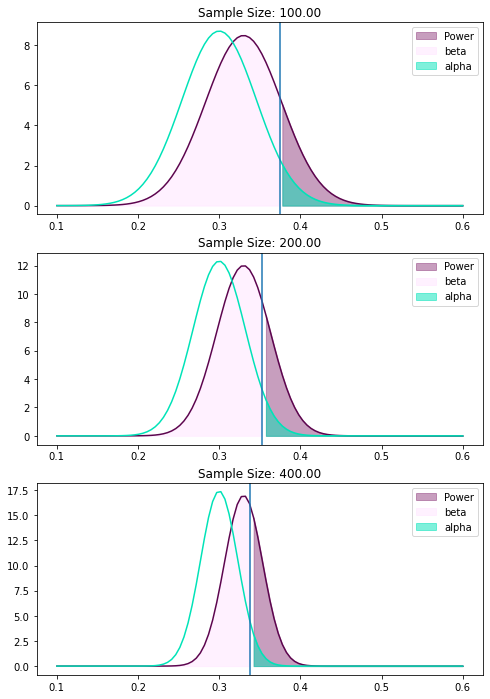

In [28]:

fig,axes = plt.subplots(3, figsize = (8, 12))

for ax_idx, ax in enumerate(axes):
    n= 100 * 2 ** ax_idx
    karen_proportion = 0.33

    # sampling distribution
    karen_sample_mean = karen_proportion
    karen_sd = np.sqrt(karen_proportion * (1-karen_proportion))
    karen_sample_mean_sd = karen_sd / np.sqrt(n)


    karen = stats.norm(karen_sample_mean, karen_sample_mean_sd)
    null = stats.norm(0.3, np.sqrt(0.3 * 0.7 / n))
    
    support = np.linspace(0.1, 0.6, 100)
    karen_pdf = karen.pdf(support)
    null_pdf = null.pdf(support)
    
    critical_value = stats.norm(0.3, np.sqrt((null_proportion * (1-null_proportion))/n)).ppf(0.95)
    critical_value_idx = np.argmax(support>critical_value)
    
    ax.plot(support, karen_pdf, color='#5C054E')
    ax.plot(support, null_pdf, color='#00E3B8')

    ax.axvline(critical_value)
    
    ax.fill_between(support, karen_pdf, where = (support >= critical_value), label = 'Power', color = '#913F7F', alpha = 0.5)
    ax.fill_between(support, karen_pdf, where = (support <= critical_value), alpha = 0.5, label = 'beta', color = '#FFE5FF')
    ax.fill_between(support, null_pdf, where = (support >= critical_value), label = 'alpha', color = '#00E3B8', alpha = 0.5)
    
    ax.legend()
    ax.set_title("Sample Size: {:.2f}".format(n))


## Power is a function of sample size, effect size, alpha, and standard deviation

$$ n = \left( \frac{ \sigma ( F_{0, 1}^{-1} (1 - \alpha) - F_{0, 1}^{-1} (\beta) ) } { \mu_a - \mu_0 } \right)^2 $$




$F_{0, 1}^{-1}$ is equivalent to `stats.norm(0,1).ppf()`

This is the formula for the sample size needed to achieve a given power $(1 - \beta)$.

$\sigma$ is the standard deviation

$\mu_a - \mu_0$ is the effect size. (mean under alternative vs mean under null).

$\alpha$ is maximum acceptable false positive rate aka incorrectly rejecting null hypothesis. $\alpha$

$\beta$ is maximum acceptable fals negative rate, aka incorrectly failing to reject null hypothesis

$n$ is the sample size

In [31]:
# Spend some time coding this up

def sample_size_needed_for_power(sigma, alpha, power, effect_size):
    standard_normal = stats.norm(0, 1)
    beta = 1 - power
    numerator = sigma * (standard_normal.ppf(1 - alpha) - standard_normal.ppf(beta))
    return int((numerator / effect_size) ** 2)

In [33]:
mu_a = 0.01
mu_b = 0.012
effect_size = mu_b - mu_a

sigma = 0.099

alpha = 0.01
power = 0.95
beta = 1 - power





sample_size_needed_for_power(sigma, alpha, power, effect_size)

38641

# Power calculation examples

### CTR
Our current click through rate for our ads is 2%. We'd like to try a new ad and if it's better, we'll put it into production. We want to be able to detect a bump of at least a tenth of a point. We'd like to be 95% confident that the new ad is better than 2%. If the new ad actually is better, we want at least an 80% chance of knowing that. How many impressions do we need?

$H_0$:  <br>
$H_a$: 

effect size:

alpha: 

power:  

sigma: 

<!-- sigma = np.sqrt(p*1-p) for proportions since we dont need count -->

In [36]:
mu_a = 0.02
mu_a + (.01/10)

0.021

In [39]:
mu_a = 0.02
effect_size = (.01/10) #tenth of a point
confident_level = 0.95
alpha = 1 - confident_level
power = 0.8
beta = 1 - power
sigma = 1

sample_size_needed_for_power(sigma, alpha , power, effect_size ) 

6182557

What can you tell your product manager?

### Student Assessment scores
At Galvanize, students get on average, 65% on assessments (*this is made up, I have no idea*). A new instructor has been hired, and we want to know if they are adequately teaching their students. The standard deviation for assessment scores is 3 points. We'd like to be able to detect if the average score is 60% or less, with a significance level of 0.01, and a power of 0.9. How many student assessment scores do we need to see to make this determination?


$H_0$:  <br>
$H_a$: 

effect size: 

alpha: 

power: 

sigma: 

In [40]:
mu_a = 0.65
effect_size = 0.05
confident_level = 0.99
alpha = 1 - confident_level
power = 0.9
beta = 1 - power
sigma = 3

sample_size_needed_for_power(sigma, alpha , power, effect_size ) 

46860

# MURDER MOST FOUL

We have a bunch of horror movie characters who have all been convicted of murders.

Investigators on average solve 80% of murders.
When they use DNA tests, are they better at solving murders?

$H_0$: DNA testing does not give us better than 80% solve rate. <br>
$H_a$: DNA testing gives us better than 80% solve rate

Type I Error: Inaccurately rejecting that DNA test does not give better rate when it doesn't
Type II Error: Concluding DNA doesn't give better result when it does

alpha: 

beta:  


If we assume Type I Error is worse than Type II, what should we set for alpha and beta. 

If the actual solve rate using DNA testing is at least 85% we want to be able to detect that. 

Sample size is how many cases we need to look at to determine whether or not DNA evidence is useful. 

* alpha = 
* beta = 
* effect_size = 
* sigma = 



In [41]:
mu_0 = 0.8
mu_a = 0.85
effect_size = mu_a - mu_0

alpha = 0.01
power = 0.8





sample_size_needed_for_power(sigma, alpha , power, effect_size ) 

36129

### Why is the proportion standard deviation sqrt(pq)?

The population is distributed as a Bernoulli distribution. Positive case is '1' and negative case is '0'. Every individual sampled from the population is a sample from a Bernoulli distribution. The standard deviation for the Bernoulli distribution is sqrt(pq). 